# <font color=#E6ae1d size=5> Estimação 📊</font>

--- 


In [1]:
import pandas as pd
import numpy as np

In [2]:
dados = pd.read_csv("dados.csv")
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [3]:
def generate_samples(dataframe: pd.DataFrame, 
                     num_amostras: int,
                     tamanho_amostra: int) -> pd.DataFrame:
    """
    Gera um dataframe com 2000 amostras de tamanho 1500.
    Cada coluna representa uma amostra aleatória da coluna 'Idade'.
    """
    # Lista para armazenar as amostras
    lista_amostras = []

    for _ in range(num_amostras):
        amostra = dataframe['Idade'].sample(tamanho_amostra).reset_index(drop=True)
        lista_amostras.append(amostra)

    # Concatena todas as amostras como colunas
    amostras_df = pd.concat(lista_amostras, axis=1)
    amostras_df.columns = [f'Amostra_{i+1}' for i in range(num_amostras)]

    return amostras_df

In [4]:
amostras = generate_samples(dados, num_amostras=1_500, tamanho_amostra=2000)
amostras

,Amostra_1,Amostra_2,Amostra_3,Amostra_4,Amostra_5,Amostra_6,Amostra_7,Amostra_8,Amostra_9,Amostra_10,...,Amostra_1491,Amostra_1492,Amostra_1493,Amostra_1494,Amostra_1495,Amostra_1496,Amostra_1497,Amostra_1498,Amostra_1499,Amostra_1500
0,47,62,34,43,50,44,52,34,50,49,...,67,41,34,42,45,80,47,39,36,29
1,39,35,32,48,51,47,41,54,35,51,...,64,35,40,41,39,28,22,29,61,30
2,70,54,51,57,49,44,30,32,60,30,...,45,60,44,54,41,49,67,44,27,58
3,50,37,60,45,79,45,56,31,69,46,...,31,35,66,59,33,62,82,58,47,49
4,42,31,55,40,41,63,49,52,49,37,...,53,27,55,27,66,56,59,41,59,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,54,23,31,30,41,46,34,25,33,51,...,58,36,43,64,53,61,27,46,75,42
1996,33,57,37,37,48,43,49,49,32,53,...,62,26,54,48,39,25,36,48,31,42
1997,38,30,32,58,55,38,26,43,32,66,...,34,43,42,41,45,51,73,61,35,60
1998,33,40,29,60,33,57,37,59,58,60,...,53,38,33,43,39,28,42,42,35,37


<Axes: >

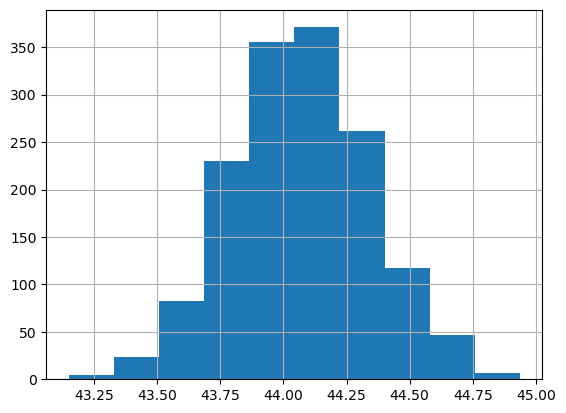

In [5]:
amostras.mean().hist()

$$
\sigma_{\bar{X}} = \frac{\sigma}{\sqrt{n}}
$$  

> A distribuição das médias amostrais, independentemente da distribuição original, tende a uma normal de média igual a da população e desvio padrão da variável original divido pela raiz quadrada do tamanho da amostra. Resultado assegurado para $N > 30$.


In [6]:
sigma = amostras.mean().std()

sigma_barX = dados['Idade'].std()
n = amostras.shape[0]

In [7]:
sigma_barX / np.sqrt(n)

0.2790743302740527

In [8]:
sigma

0.2726761672680976

<h3> Níveis de confiança e significância </h3>

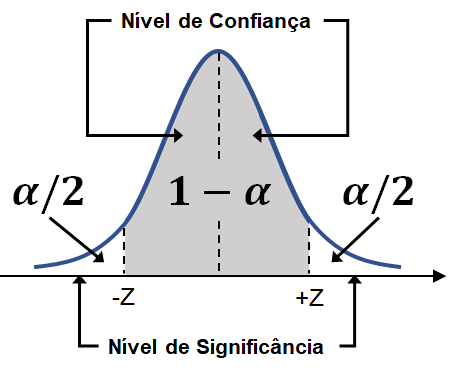

$$
\mu = \bar{x} \pm z \frac{\sigma}{\sqrt{n}} = \bar{x} \pm e
$$



\begin{array}{|c|c|c|c|}
\hline
\text{Nível de confiança } (1-\alpha) & \alpha & \alpha/2 & z_{\alpha/2} \\
\hline
90\% & 0.10 & 0.05 & 1.645 \\
95\% & 0.05 & 0.025 & 1.960 \\
99\% & 0.01 & 0.005 & 2.576 \\
\hline
\end{array}




Para estimar o valor médio gasto por cada cliente de uma grande rede de fast-food, foi selecionada uma amostra de 50 clientes.

Assumindo que o valor do desvio padrão da população seja de R$ 6,00 e que esta população se distribui normalmente, obtenha a margem de erro desta estimativa para um nível de confiança de 95%

In [9]:
from scipy.stats import norm

In [15]:
n = 50           # clientes
stdev_pop = 6    # desvio padrão da população
conf = 0.95      # nível de confiança 
alpha = 1 - conf # nível de significância

z = norm.ppf(q=(1-alpha/2))
print(f'valor de {z = }')

erro = z * (stdev_pop/np.sqrt(n))
print(f'{erro = }')

valor de z = 1.959963984540054
erro = 1.6630845892196133


Uma amostra aleatória simples de 1976 itens de uma população normalmente distribuída, com desvio padrão populacional igual a 11, resultou em uma média amostral de 28.

Qual o intervalo de confiança de 90% para a média populacional?

In [25]:
# Na mão
n = 1976 
stdev_pop = 11
media_amostral = 28
z = norm.ppf(0.9)

erro = z * (stdev_pop/np.sqrt(n))
intevalo_de_confianca_sup = media_amostral + erro 
intevalo_de_confianca_inf = media_amostral - erro

print(f'{intevalo_de_confianca_inf:} {intevalo_de_confianca_sup}')

27.682871480163502 28.317128519836498


In [26]:
# scipy
n = 1976 
stdev_pop = 11
media_amostral = 28

norm.interval(
    confidence=0.9,
    loc = media_amostral,
    scale = stdev_pop/np.sqrt(n)
)

(27.592969951356466, 28.407030048643534)

Nesta aula, aprendemos:

1. A conceituação de parâmetros e de estimativa
2. O teorema do limite central
3. Níveis de confiança e de significância
4. A obter a margem de erro de um experimento
5. A obter intervalos de confiança para uma estimativa pontual (estimação intervalar)